In [3]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv("spambase.data").values
np.random.shuffle(data)

In [32]:
# first 48 columns are out predictor variables
x = data[:,:48]
y = data[:,-1] # -1 indicates last column which is criterion variable

X_train = x[:-100,] # except last 100 rows
y_train = y[:-100,]
X_test = x[-100:,]# last 100 rows as test data
y_test = y[-100:,]

In [40]:
model = MultinomialNB()
model.fit(X_train,y_train)
print("Classificaiton rate for NB:", model.score(X_test,y_test))
# with MultinomialNB(), we have prediciton accuracy of 88%

Classificaiton rate for NB: 0.88


In [39]:
# Let's try with another Classification model
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
print("Classificaiton rate for AdaBoost:", model.score(X_test,y_test))
# AdaBoost is doing much better

Classificaiton rate for AdaBoost: 0.93


### SMS Spam Colleciton Dataset
Link: https://www.kaggle.com/uciml/sms-spam-collection-dataset/downloads/sms-spam-collection-dataset.zip/1<br>

Pre-Process Data:<br>
1. TF-IDF Vectorizer<br>
TF-IDF: Vector representation of Text. CommonLounge. TF-IDF is an abbreviation for Term Frequency-Inverse Document Frequency and is a very common algorithm to transform text into a meaningful representation of numbers. The technique is widely used to extract features across various NLP applications.

2. Count Vectorizer<br>
Count Vectorization involves counting the number of occurrences each words appears in a document


In [34]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
# read the data
data = pd.read_csv("spamcollection-Kaggle.csv", encoding ='ISO-8859-1')
data.head()

# if we dnt use encoding parameter as above, we will get below error
# UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte
# This is beacause, csv file contains non-character sysmbols like any emoji's

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
print(data.shape)
print(data.isnull().sum())

(5572, 5)
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [14]:
# REMOVE the Unnecessary columns
df = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis =1)
# Rename the column names
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# Creating binary labels
df['b_labels'] = df['label'].map({'ham':0,'spam':1})
y = df['b_labels'].values

In [25]:
# Calucuating features using TFIDF vectorizers
tfidf = TfidfVectorizer(decode_error = 'ignore')
tfidf_x = tfidf.fit_transform(df['message'])

# Calucuating features using COUNT vectorizers
count_vec = CountVectorizer(decode_error = 'ignore')
count_x = count_vec.fit_transform(df['message'])

In [26]:
df.head(10)

,label,message,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


### Model using CountVectorizer

In [30]:
# Split Up the data
X_train, X_test,y_train, y_test = train_test_split(count_x,y, test_size=0.3)

#Create a model, train it and print the scores
model = MultinomialNB()
model.fit(X_train,y_train)
print("Train data accuracy score: ", model.score(X_train, y_train))
print("Test data accuracy score: ", model.score(X_test, y_test))

Train data accuracy score:  0.9935897435897436
Test data accuracy score:  0.9814593301435407


### Model using TfidfVectorizer

In [32]:
# Split Up the data
X_train, X_test,y_train, y_test = train_test_split(tfidf_x,y, test_size=0.3)

#Create a model, train it and print the scores
model = MultinomialNB()
model.fit(X_train,y_train)
print("Train data accuracy score: ", model.score(X_train, y_train))
print("Test data accuracy score: ", model.score(X_test, y_test))

Train data accuracy score:  0.9656410256410256
Test data accuracy score:  0.9617224880382775


### Visualize the word cloud

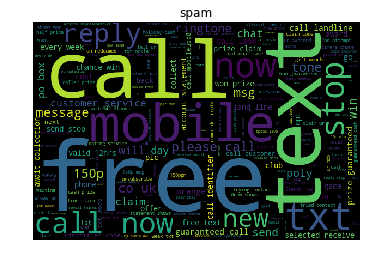

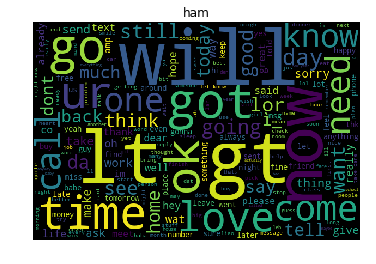

In [40]:
def visualize(label):
    words =''
    for msg in df[df['label'] == label]['message']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width = 600, height =400).generate(words)
    plt.imshow(wordcloud)
    plt.title(label)
    plt.axis('off')
    plt.show()

# Visuslize a word cloud for data in label == spam
visualize('spam')

#Visuslize a word cloud for data in label == ham
visualize('ham')

### Lets see what's going wrong - we are trying to find out the messages that ain't classified correctly using CountVectorizer

In [59]:
import colorama
from colorama import Fore, Style

df['predictions'] = model.predict(count_x)

# thinngs that are actually SPAM but classified as HAM
print(Fore.RED  + "Messages that are actually SPAM but classified as HAM")
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['message']
for msg in sneaky_spam:
    print( Style.RESET_ALL + '\n' + msg )

# thinngs that are actually HAM but classified as SPAM
print(Fore.RED  +'\n' + "Messages that are actually HAM but classified as SPAM")
poor_ham = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['message']
for msg in poor_ham:
    print( Style.RESET_ALL + '\n' + msg)

Messages that are actually SPAM but classified as HAM

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"

You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again

BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu

Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES

Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY

### Lets see what's going wrong - we are trying to find out the messages that ain't classified correctly using TFIDFVectorizer

In [60]:
import colorama
from colorama import Fore, Style

df['predictions'] = model.predict(tfidf_x)

# thinngs that are actually SPAM but classified as HAM
print(Fore.RED  + "Messages that are actually SPAM but classified as HAM")
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['message']
for msg in sneaky_spam:
    print( Style.RESET_ALL + '\n' + msg )

# thinngs that are actually HAM but classified as SPAM
print(Fore.RED  +'\n' + "Messages that are actually HAM but classified as SPAM")
poor_ham = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['message']
for msg in poor_ham:
    print( Style.RESET_ALL + '\n' + msg)

Messages that are actually SPAM but classified as HAM

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged

SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV

Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"

You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again

FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcol